# Audio Composition Analyser using KNeighbors
C S Sahil 19BCE2094 , Anmol Bhardwaj 19BCE0675

## 1. Import Libraries

In [1]:
# Import libraries 

from python_speech_features import mfcc
import scipy.io.wavfile as wav
import numpy as np
from tempfile import TemporaryFile
import os
import pickle
import random 
import operator
import math
import numpy as np

In [2]:
import pandas as pd

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Load DataSet

In [5]:
###   READ CSV FILES WITH DATA   ####

features = pd.read_csv("features.csv")
genres = pd.read_csv("genres.csv")

# Genres dictionary
genresDic = {
    1: "Blues",
    2: "Classical",
    3: "Country",
    4: "Disco",
    5: "Hip Hop",
    6: "Jazz",
    7: "Metal",
    8: "Pop",
    9: "Reggae",
    10: "Rock"
}

## 3. Standardize Scale

In [6]:
def standardize(data):
    scaler = StandardScaler()
    scaler.fit(data)
    scaledData = scaler.transform(data)
    return pd.DataFrame(scaledData, columns=data.columns[:])

In [7]:
df_feat = standardize(features)
df_feat

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F172,F173,F174,F175,F176,F177,F178,F179,F180,F181
0,0.270973,-0.127847,0.722965,0.656796,-0.615857,-0.148250,-0.564720,-0.408985,0.102941,-0.109106,...,-0.739966,0.135703,0.295860,-0.785628,-0.762488,-0.140165,-0.608138,0.337143,0.282861,-0.614068
1,-0.714168,0.261696,-0.482031,0.414503,-2.652460,-0.786573,-1.329539,-2.900857,0.894233,-1.019298,...,-0.052732,-1.241419,-0.489888,1.264134,0.629181,-0.137173,-0.771948,-0.214311,-0.359266,0.209481
2,0.504779,-0.073998,-0.088273,-0.207069,-0.510054,0.290802,0.203097,-0.529806,-0.146074,-0.472069,...,1.056673,-1.384661,-0.103685,-0.008762,-0.756548,-0.132411,0.009954,0.234618,-2.015009,-0.010838
3,-0.738413,0.069474,-0.486758,0.761254,0.044534,-1.514468,-0.471734,-1.034673,-0.913166,-0.572799,...,-0.186965,-1.606036,-0.541326,0.971464,0.204211,-0.234535,-0.432736,-0.286641,-1.157078,-0.452965
4,-0.195277,0.089357,-1.187554,-0.320837,1.874467,-1.243936,1.796846,1.802900,1.151487,-1.641215,...,-1.185515,-1.206998,0.875194,0.990349,-0.268946,-1.543012,0.996920,0.545979,-1.017532,0.573965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.048603,-0.177711,0.064313,0.556490,-0.169722,0.229966,0.182351,-0.164457,-0.318256,-0.273025,...,-0.164699,-0.726277,-0.534927,-0.412745,-0.260562,-0.554906,-0.996470,0.035648,1.048687,0.212329
996,0.009827,-0.103922,-0.096967,0.479393,-0.192720,0.123183,-0.203838,-0.300958,-0.983380,-0.276451,...,-0.124281,-0.113861,0.070178,0.109582,0.075008,0.083156,0.068300,0.407974,-0.608246,-1.241892
997,0.173850,-0.195034,0.139803,0.476668,-0.313193,0.437053,0.277001,0.349994,0.383720,-0.197373,...,1.389437,-0.237918,0.699850,-0.198866,-0.321658,0.477405,-0.747616,-0.160213,-0.265182,-0.410179
998,-0.849552,0.335393,-0.648573,-1.396481,-1.082275,1.561251,2.224351,1.056659,0.521143,0.963748,...,0.400214,-0.059095,-0.031555,-0.103718,0.341030,0.431600,0.262041,-0.135034,-0.148325,-0.381238


## 4. Features Reduction PCA

In [8]:
# Cast array to DataFrame

from sklearn.decomposition import PCA

pca = PCA(n_components = 8)

pca.fit(df_feat)

df_pca = pca.transform(df_feat)

df_features = pd.DataFrame(df_pca)

df_features

,0,1,2,3,4,5,6,7
0,-3.393699,-0.123304,-2.170195,-1.413601,0.645174,1.179340,1.902020,0.471308
1,1.403736,0.710064,-5.125925,-3.797323,2.523279,-0.430833,2.064510,1.801852
2,-3.033875,0.639691,-1.688305,-2.535884,0.717599,0.787981,0.772491,-0.645561
3,2.787330,-2.387084,-1.472101,-2.806713,2.776094,-0.621548,1.771439,0.190292
4,-4.828421,1.592622,-0.594221,0.059596,3.356801,-4.143386,-2.098267,-2.297792
...,...,...,...,...,...,...,...,...
995,-4.063662,0.091393,0.152074,-1.689477,-0.204401,0.567531,1.817797,-0.010282
996,-3.592952,-3.616816,-0.133490,-2.878134,1.058585,0.793183,-1.139039,-0.556238
997,-3.845813,-1.528404,1.220900,-2.658992,-0.956755,0.022507,-0.743164,-0.048686
998,-2.808613,2.036010,1.482441,-2.590593,-1.087973,-0.601157,0.326799,1.442724


## 5.  Split data

In [9]:
# Use train_test_split to split randomly, having 30% of the data for testing.

X = df_features
y = genres

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 6. Apply KNN Model

In [10]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train.values.ravel()) #.values will give the values in an array. (shape: (n,1) .ravel will convert that array shape to (n, )
pred = knn.predict(X_test)

## 7. Evaluate

In [11]:
# Confusion Matrix and Classification Report

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[15  0  3  2  0  2  0  0  1  1]
 [ 0 33  1  1  0  5  0  0  0  0]
 [ 0  1 11  6  1  0  0  2  1  6]
 [ 4  0  2  9  1  0  2  3  0  8]
 [ 4  0  0  2 17  0  1  3  3  0]
 [ 1  5  1  0  0 16  0  0  1  0]
 [ 3  1  0  1  1  0 21  0  0  5]
 [ 0  0  2  6  0  1  0 17  0  0]
 [ 1  0  3  2  6  0  1  1 22  1]
 [ 4  1  2  5  0  1  4  4  1  8]]
              precision    recall  f1-score   support

           1       0.47      0.62      0.54        24
           2       0.80      0.82      0.81        40
           3       0.44      0.39      0.42        28
           4       0.26      0.31      0.29        29
           5       0.65      0.57      0.61        30
           6       0.64      0.67      0.65        24
           7       0.72      0.66      0.69        32
           8       0.57      0.65      0.61        26
           9       0.76      0.59      0.67        37
          10       0.28      0.27      0.27        30

    accuracy                           0.56       300
   macro avg       

##  8. Optimize

In [12]:
# Iterate the model for different k values and calculate Error Rates 
error_rate = []

for i in range(1,200):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train.values.ravel())
    prediction = knn.predict(X_test)
    error_rate.append(np.mean(prediction!=y_test.values.ravel())) # Mean of boolean array, 1: mistake, 0: right

Text(0, 0.5, 'Error Rate')

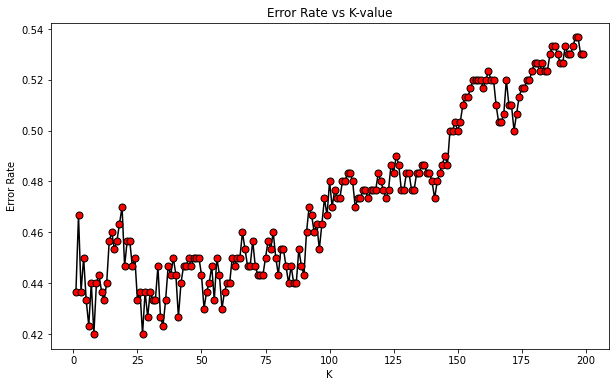

In [13]:
# Plot error rates to optimize k value

plt.figure(figsize=(10,6))
plt.plot(range(1,200), error_rate, color="black", linestyle="-", marker="o", markerfacecolor="red", markersize=7)
plt.title("Error Rate vs K-value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [14]:
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train,y_train.values.ravel())
pred = knn.predict(X_test)


print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

[[14  0  4  3  0  1  2  0  0  0]
 [ 0 33  2  0  0  4  0  0  1  0]
 [ 3  2 11  5  0  1  0  2  0  4]
 [ 1  0  1 11  0  1  6  5  0  4]
 [ 2  0  0  3 14  2  2  4  3  0]
 [ 0 12  0  0  0 10  1  1  0  0]
 [ 2  0  0  1  1  1 27  0  0  0]
 [ 0  0  1  1  0  0  0 24  0  0]
 [ 1  0  3  1 14  2  0  1 14  1]
 [ 2  2  0  6  1  0  6  2  0 11]]


              precision    recall  f1-score   support

           1       0.56      0.58      0.57        24
           2       0.67      0.82      0.74        40
           3       0.50      0.39      0.44        28
           4       0.35      0.38      0.37        29
           5       0.47      0.47      0.47        30
           6       0.45      0.42      0.43        24
           7       0.61      0.84      0.71        32
           8       0.62      0.92      0.74        26
           9       0.78      0.38      0.51        37
          10       0.55      0.37      0.44        30

    accuracy                           0.56       300
   macro avg     

In [15]:
def loadSong(file, data):
    (rate,sig)=wav.read(file)
    mfcc_feat=mfcc(sig,rate,nfft=int(rate/31.25),winlen=0.020,appendEnergy=False)
    covariance = np.cov(np.matrix.transpose(mfcc_feat))
    mean_matrix = mfcc_feat.mean(0)
    feature=(mean_matrix,covariance,0)
    
    array = []
    for j in range(0,13):
        array.append(feature[0][j])
        for h in range(0,13):
            array.append(feature[1][j][h])
    return standardize(data.append(dict(zip(data.columns, array)), ignore_index=True))

In [16]:
# PCA to uploaded song
# importing Statistics module


df = loadSong("beethoven.wav", features)

pca_song = pca.transform(df)

NewSong_df = pd.DataFrame(pca_song).describe()

PredSong = NewSong_df.loc[['mean']]
print(PredSong)
knn.predict(PredSong)
print("This song is probably", genresDic[pred[0]])
print(pred)

                 0             1             2             3             4  \
mean  1.116212e-15  7.271351e-16 -1.765709e-16 -4.214633e-17  4.658278e-17   

                 5             6             7  
mean -2.479979e-16  1.685853e-17  2.433396e-16  
This song is probably Classical
[ 2  3  2  9  6  7  3  7  9  5  9  4  8  4  7  4  2 10  1  2  5  7  5  8
  8  4  2  1  5  8  1  1  2  7  4 10  2  2  9  2  5 10 10  3  7  3  7  7
  7 10  9 10  2  4  3  6  4  6  9  5  4  1  5  7  8  2  6 10  6  9  7 10
  9  3  7  2  6 10  1  2  2  4  5  6  7  7  1  4  2  3  7  2  1  8  9 10
  8  8  4  1  7  1  8  9  2  1  9 10  2  8  2  8  1  5  6  7  7  5  3  2
  8  5  2  1  1  8  7  8  3  2  2  7  7  1  1  4  1  8 10  2  4  8  6  7
  7  5  9  3  4  7  5  2  6  1  1  3  2  6  9  3  2  7  6  7  7  8  4  6
  8  7  4  6  4  1 10  4  5  8  5  2  4  8  9  5  1  4  9  6  3  2 10  5
  9  5  8  7  5  8  8  5  7  2  4  3  4  8  3  2  2  3  1  7  8  8  2  2
  7  5  5  8  6  6  3  5 10  2  7  3  2  1 10  6 10  8  

In [17]:
# Use all data to train and only the last row to test (last row is the testing song features)

#xTrain = df.iloc[:-1]
#yTrain = genres
#xTest = df.iloc[-1:]

In [18]:
# Try for different k values

#for i in range(1,50):
#    knn = KNeighborsClassifier(n_neighbors=i)
#    knn.fit(xTrain,yTrain.values.ravel())
#    pred = knn.predict(xTest) #Transpose
#    print(genresDic[pred[0]])